## ARSI HPC stats and scenarios
### Exploratory data analysis
Find trends in the jobs-datasets from each user on csf4
Including completed/failed jobs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Path on Windows
home="/mnt/c/Users/const/Documents/Constantinos/myIT/29th-Jan-2025"

In [3]:
#Find the name of the sheets
xl = pd.ExcelFile(home+"/Users.xlsx")

xl.sheet_names  # see all sheet names

['2024-csf4-ewan',
 '2024-csf4-ehimen',
 '2024-csf4-ck',
 '2024-csf4',
 '2024-csf3']

In [4]:
df_usera = pd.read_excel(home+"/Users.xlsx", sheet_name="2024-csf4-ewan")
df_usera.head()

,JobID,JobName,Partition,State,Time Elapsed-hours,AllocCPUS,ReqMem,ReqMem.1
0,5098248,Run_curre+,multinode,COMPLETED,80.350800,80,320G,320
1,5110826,Run_curre+,multinode,COMPLETED,28.157200,80,320G,320
2,5115290,bash,serial,COMPLETED,0.975278,1,4G,4
3,5359164,code_satu+,serial,COMPLETED,0.003333,1,4G,4
4,5362411,code_satu+,serial,COMPLETED,0.002778,1,4G,4


In [5]:
df_userb = pd.read_excel(home+"/Users.xlsx", sheet_name="2024-csf4-ck")
df_userb.tail()

,JobID,JobName,Partition,State,Time Elapsed-hours,AllocCPUS,ReqMem,ReqMem.1
442,9663491,mcnocht-e+,multicore,FAILED,0.004444,8,32G,32
443,9663846,mcnocht-e+,multicore,FAILED,0.004167,8,32G,32
444,9676733,mcnocht-e+,multicore,FAILED,0.002500,8,32G,32
445,9676746,mcnocht-e+,multicore,FAILED,0.001944,8,32G,32
446,9676784,mcnocht-e+,multicore,FAILED,0.003056,8,32G,32


In [6]:
df_userc = pd.read_excel(home+"/Users.xlsx", sheet_name="2024-csf4-ehimen")
df_userc.head()


,JobID,JobName,Partition,State,Time Elapsed-hours,AllocCPUS,ReqMem,ReqMem.1
0,8449853.0,scBl46Ref+,multinode,COMPLETED,1.155540,160.0,640G,640.0
1,8720477.0,scCur41Re+,multinode,COMPLETED,1.009100,200.0,800G,800.0
2,9461864.0,scBl46P,multinode,COMPLETED,6.521700,160.0,640G,640.0
3,9487465.0,scCur41Re+,multinode,COMPLETED,1.234910,200.0,800G,800.0
4,7000390.0,scBlunt46+,multinode,FAILED,0.001667,160.0,640G,640.0


In [7]:
print(df_usera.shape,
df_userb.shape,
df_userc.shape)


(29, 8) (447, 8) (189, 8)


### Data Info and Cleansing

In [8]:
df_usera.describe()

,JobID,Time Elapsed-hours,AllocCPUS,ReqMem.1
count,2.900000e+01,29.000000,29.000000,29.000000
mean,6.229456e+06,17.849873,90.034483,332.620690
std,1.320186e+06,32.200368,82.143812,323.802896
min,4.928479e+06,0.000278,1.000000,2.000000
25%,5.244220e+06,0.005556,1.000000,4.000000
50%,5.376073e+06,0.231111,80.000000,320.000000
75%,7.061788e+06,28.157200,200.000000,800.000000
max,9.624745e+06,124.366000,200.000000,800.000000


In [9]:
df_usera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JobID               29 non-null     int64  
 1   JobName             29 non-null     object 
 2   Partition           29 non-null     object 
 3   State               29 non-null     object 
 4   Time Elapsed-hours  29 non-null     float64
 5   AllocCPUS           29 non-null     int64  
 6   ReqMem              29 non-null     object 
 7   ReqMem.1            29 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.9+ KB


In [10]:
df_usera.isna().sum()

JobID                 0
JobName               0
Partition             0
State                 0
Time Elapsed-hours    0
AllocCPUS             0
ReqMem                0
ReqMem.1              0
dtype: int64

In [11]:
df_userb.describe()

,JobID,Time Elapsed-hours,AllocCPUS,ReqMem.1
count,4.470000e+02,447.000000,447.000000,447.000000
mean,6.143201e+06,13.914898,62.340045,250.434004
std,8.793083e+05,32.335070,88.600761,354.372988
min,4.708290e+06,0.000000,0.000000,4.000000
25%,5.954972e+06,0.209306,4.000000,16.000000
50%,5.998081e+06,1.708330,4.000000,16.000000
75%,6.090556e+06,11.263450,200.000000,800.000000
max,9.676784e+06,159.988000,200.000000,800.000000


In [12]:
df_userb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JobID               447 non-null    int64  
 1   JobName             447 non-null    object 
 2   Partition           447 non-null    object 
 3   State               447 non-null    object 
 4   Time Elapsed-hours  447 non-null    float64
 5   AllocCPUS           447 non-null    int64  
 6   ReqMem              447 non-null    object 
 7   ReqMem.1            447 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 28.1+ KB


In [13]:
df_userb.isna().sum()

JobID                 0
JobName               0
Partition             0
State                 0
Time Elapsed-hours    0
AllocCPUS             0
ReqMem                0
ReqMem.1              0
dtype: int64

In [14]:
df_userb.isna().sum()

JobID                 0
JobName               0
Partition             0
State                 0
Time Elapsed-hours    0
AllocCPUS             0
ReqMem                0
ReqMem.1              0
dtype: int64

In [15]:
df_userc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JobID               54 non-null     float64
 1   JobName             53 non-null     object 
 2   Partition           53 non-null     object 
 3   State               53 non-null     object 
 4   Time Elapsed-hours  53 non-null     float64
 5   AllocCPUS           53 non-null     float64
 6   ReqMem              53 non-null     object 
 7   ReqMem.1            53 non-null     float64
dtypes: float64(4), object(4)
memory usage: 11.9+ KB


In [16]:
df_userc.describe()

,JobID,Time Elapsed-hours,AllocCPUS,ReqMem.1
count,5.400000e+01,53.000000,53.000000,53.000000
mean,7.420091e+06,25.624930,122.358491,510.566038
std,1.256762e+06,46.778970,68.978563,258.646292
min,8.000000e+00,0.000000,0.000000,4.000000
25%,7.008638e+06,0.015833,40.000000,480.000000
50%,7.200952e+06,0.202500,160.000000,640.000000
75%,7.883769e+06,17.583100,160.000000,640.000000
max,9.487465e+06,161.208000,200.000000,800.000000


In [17]:
df_userc.isna().sum()

JobID                 135
JobName               136
Partition             136
State                 136
Time Elapsed-hours    136
AllocCPUS             136
ReqMem                136
ReqMem.1              136
dtype: int64

- There are some null values in user c and user b
- the tables provides the stats from each user, max cores 200, max time in hours 161hrs i.e. ~6.7days and min time in hours is 0.000278	i.e. 0.0417s

- Remove the rows that contain zero values for user b and c

In [18]:
df_userb2=df_userb.dropna(axis=0)
df_userb2.isna().sum()
df_userc2=df_userc.dropna(axis=0)
df_userc2.isna().sum()

JobID                 0
JobName               0
Partition             0
State                 0
Time Elapsed-hours    0
AllocCPUS             0
ReqMem                0
ReqMem.1              0
dtype: int64

In [19]:
df_usera.columns

Index(['JobID', 'JobName', 'Partition', 'State', 'Time Elapsed-hours',
       'AllocCPUS', 'ReqMem', 'ReqMem.1'],
      dtype='object')

In [20]:
#Remove and rename columns
df_usera=df_usera.rename(columns={"Time Elapsed-hours": "ElapsedTime-hours",
                                  "ReqMem.1":"TOTALRAM"})
df_userb2=df_userb2.rename(columns={"Time Elapsed-hours": "ElapsedTime-hours",
                                    "ReqMem.1":"TOTALRAM"})
df_userc2=df_userc2.rename(columns={"Time Elapsed-hours": "ElapsedTime-hours",
                                    "ReqMem.1":"TOTALRAM"})


df_usera.drop(columns=["ReqMem","JobName"])
df_userb2.drop(columns=["ReqMem","JobName"])
df_userc2.drop(columns=["ReqMem","JobName"])


,JobID,Partition,State,ElapsedTime-hours,AllocCPUS,TOTALRAM
0,8449853.0,multinode,COMPLETED,1.155540,160.0,640.0
1,8720477.0,multinode,COMPLETED,1.009100,200.0,800.0
2,9461864.0,multinode,COMPLETED,6.521700,160.0,640.0
3,9487465.0,multinode,COMPLETED,1.234910,200.0,800.0
4,7000390.0,multinode,FAILED,0.001667,160.0,640.0
5,7000395.0,multinode,FAILED,0.081389,160.0,640.0
6,7000401.0,multinode,FAILED,0.031111,160.0,640.0
7,7000402.0,multinode,FAILED,0.026389,160.0,640.0
8,7000403.0,multicore,FAILED,0.000000,0.0,640.0
9,7000404.0,multicore,FAILED,1.574440,20.0,80.0


## Plot some figures based on completed jobs

/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

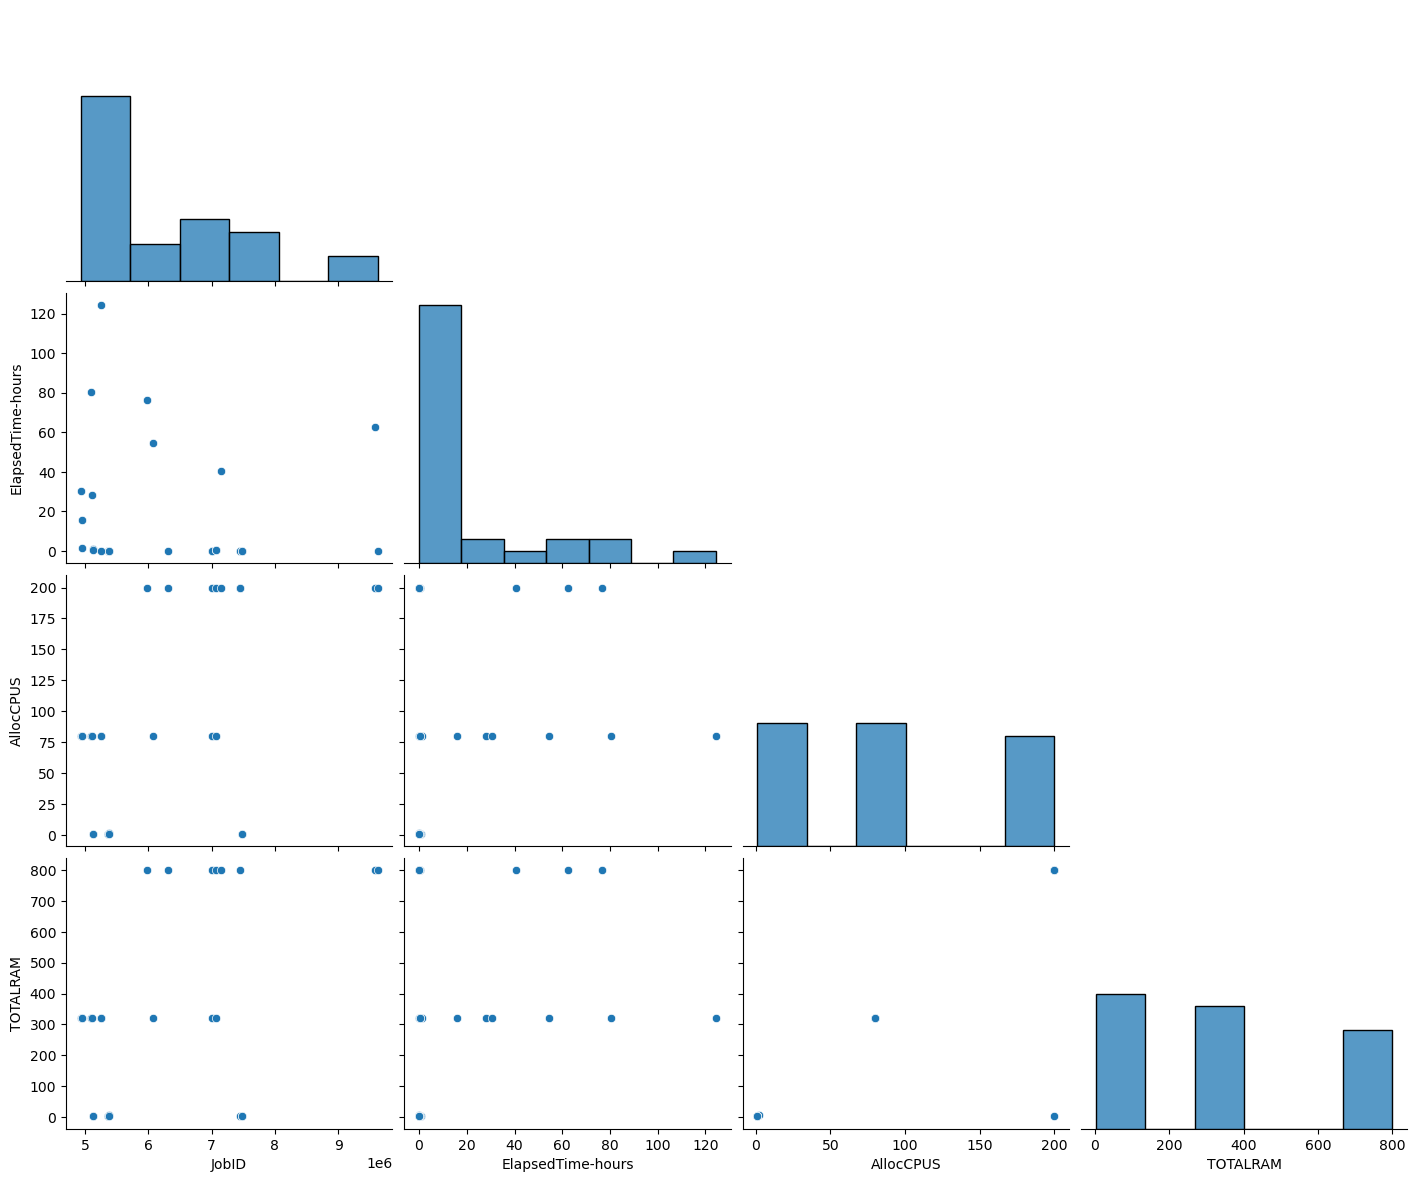

In [21]:
sns.pairplot(df_usera, diag_kind="hist", height=3, aspect=1.2, corner=True)

/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

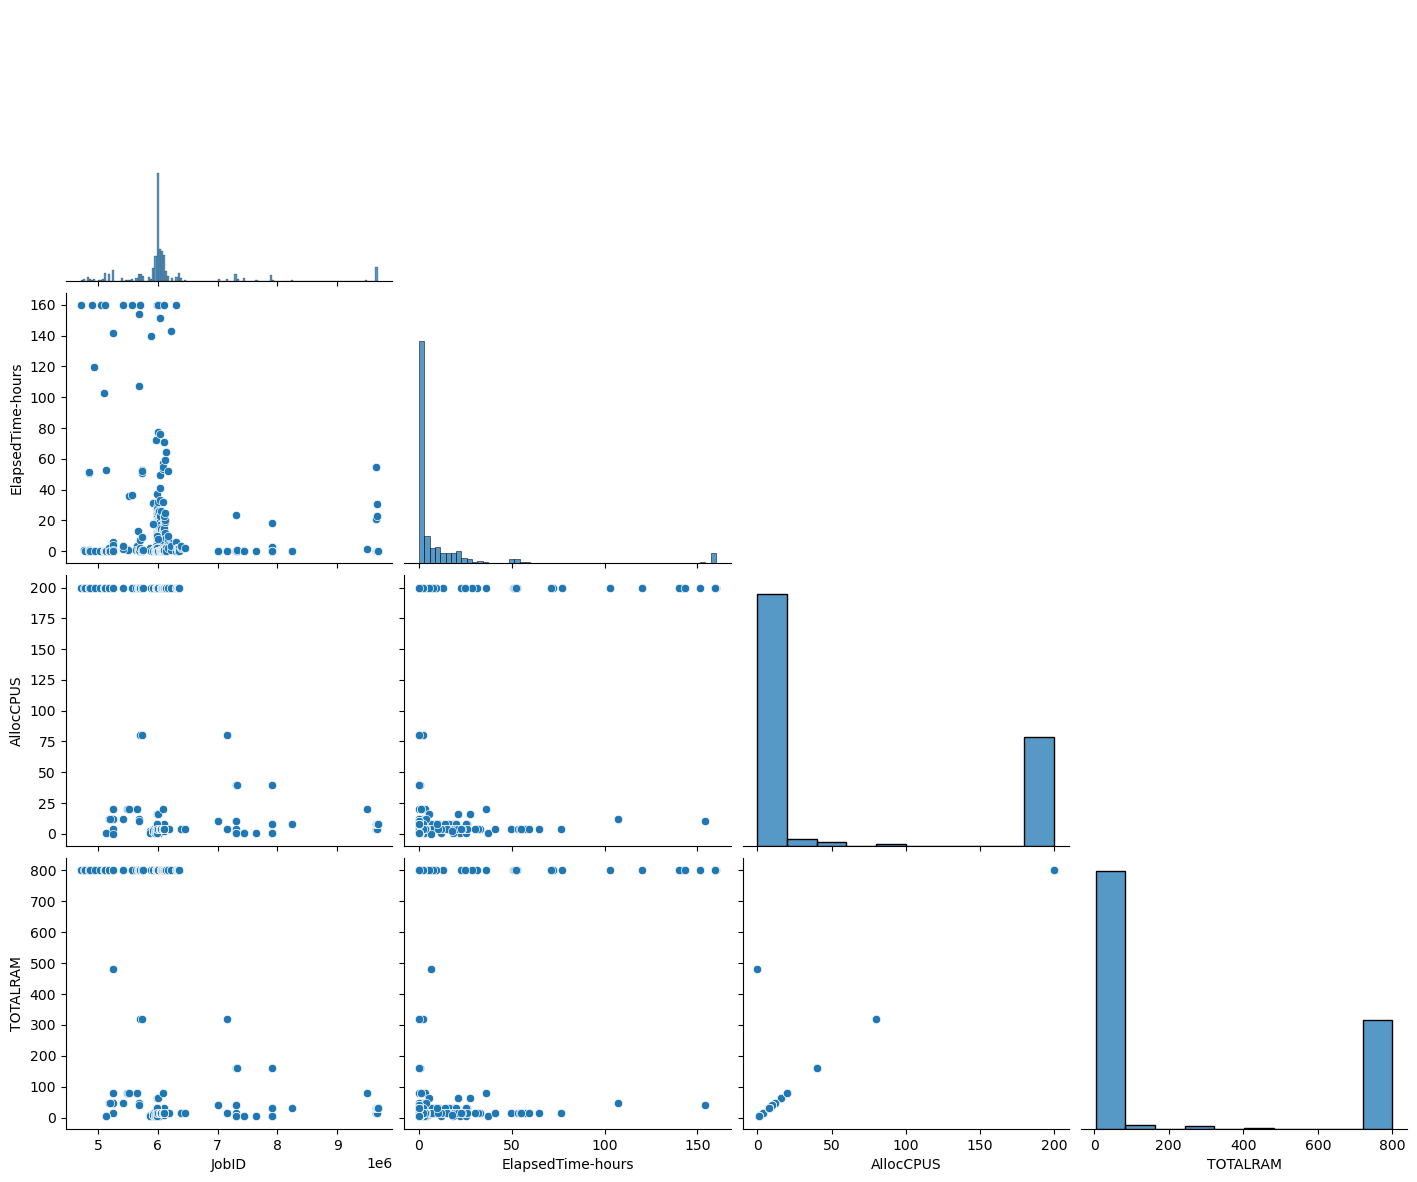

In [22]:
sns.pairplot(df_userb2, diag_kind="hist", height=3, aspect=1.2, corner=True)

/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/katsa1k/apps/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

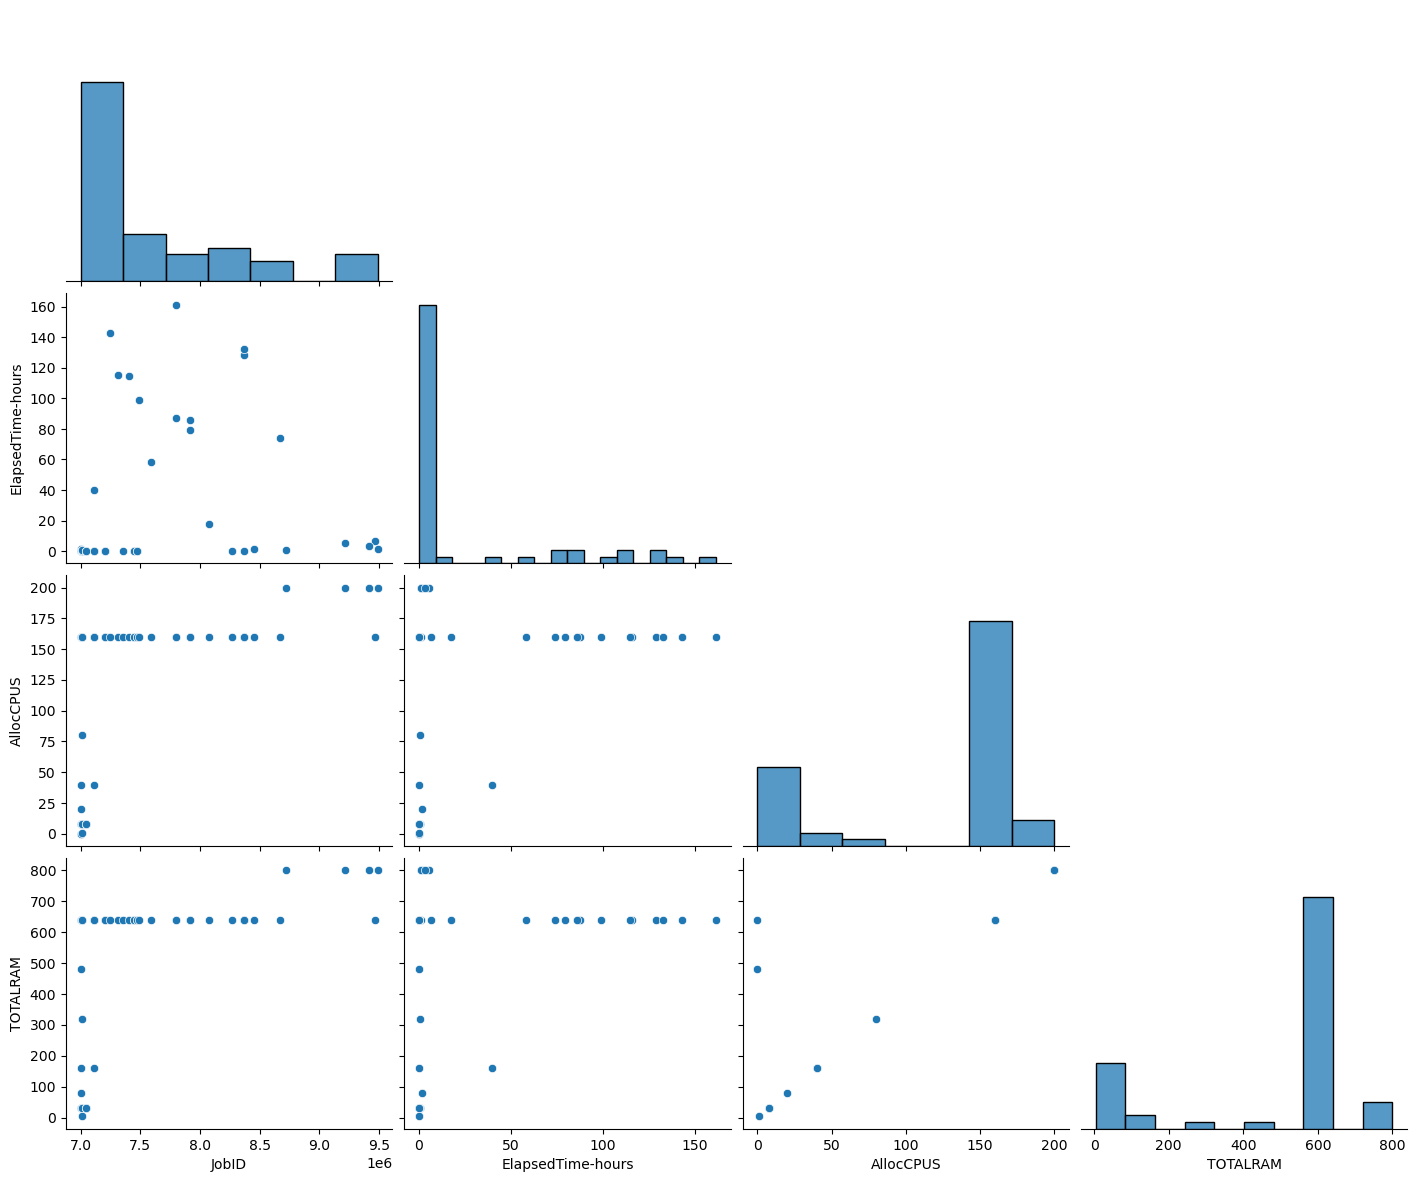

In [23]:
sns.pairplot(df_userc2, diag_kind="hist", height=3, aspect=1.2, corner=True)

### Completed versus failed jobs

In [24]:
df_all = pd.concat([df_usera, df_userb2, df_userc2], ignore_index=True, sort=False)

df_all.tail()

,JobID,JobName,Partition,State,ElapsedTime-hours,AllocCPUS,ReqMem,TOTALRAM
524,8370871.0,scCur41P,multinode,FAILED,0.106389,160.0,640G,640.0
525,8371442.0,scCur41P,multinode,FAILED,132.280000,160.0,640G,640.0
526,8671598.0,scBl46P,multinode,FAILED,73.724700,160.0,640G,640.0
527,9213097.0,scBl46Ref+,multinode,FAILED,5.511680,200.0,800G,800.0
528,9419526.0,scCur41Re+,multinode,FAILED,3.071860,200.0,800G,800.0


In [25]:
df_all.shape

(529, 8)

In [26]:
df_all.describe()

,JobID,ElapsedTime-hours,AllocCPUS,TOTALRAM
count,5.290000e+02,529.000000,529.000000,529.000000
mean,6.289887e+06,15.303832,69.871456,281.001890
std,9.890406e+05,34.151977,88.341701,352.779142
min,4.708290e+06,0.000000,0.000000,2.000000
25%,5.970870e+06,0.100833,4.000000,16.000000
50%,6.006125e+06,1.480280,8.000000,32.000000
75%,6.165025e+06,11.973900,200.000000,800.000000
max,9.676784e+06,161.208000,200.000000,800.000000


- Scatter plot if there are any trends between CPUs per job with time to complete

<Axes: xlabel='ElapsedTime-hours', ylabel='AllocCPUS'>

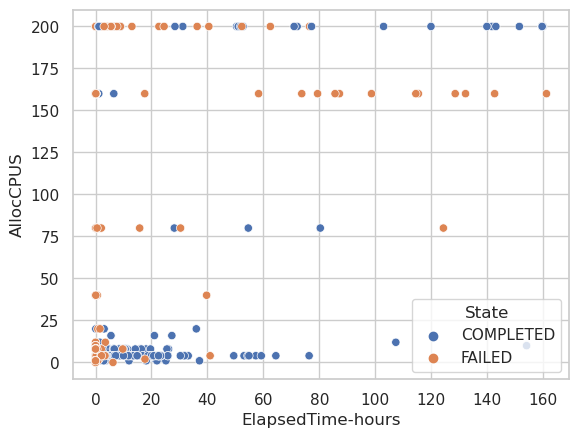

In [38]:
sns.scatterplot(data = df_all, x="ElapsedTime-hours", y="AllocCPUS",  hue="State")

- Sort by expensive sims either Saturne or STARCCM+

In [39]:
completed_jobs = df_usera["State"].unique()
completed_jobs

array(['COMPLETED', 'FAILED'], dtype=object)

## What about failed vs completed jobs

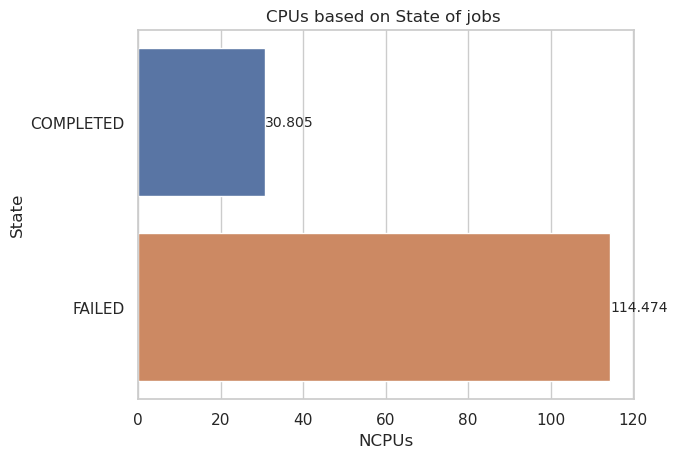

In [40]:
#Create the barplot figure
sns.set(style = "whitegrid")

figure = sns.barplot(data=df_all, 
                      y=df_all["State"], 
                      x=df_all["AllocCPUS"], 
                      hue_order=df_all["State"],
                      errorbar=None
                     )

# Add title
figure.set_title("CPUs based on State of jobs ")

#Add exact values for each bars:
figure.bar_label(figure.containers[0], fontsize=10)

#Remove y axis
figure.set(ylabel="State")

#Change x axis
figure.set(xlabel="NCPUs")

# Set x-axis limits to prevent negative values from exiting the graph
#plt.xlim(0, df_all["AllocCPUS"].max() )  # Adjust the upper limit as needed

# Show plot
plt.show()

## Check if there are any distributions

(array([307.,  15.,   9.,   0.,   7.,   0.,   0.,   0.,  14.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  34.,   0.,   0., 143.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200.]),
 <BarContainer object of 20 artists>)

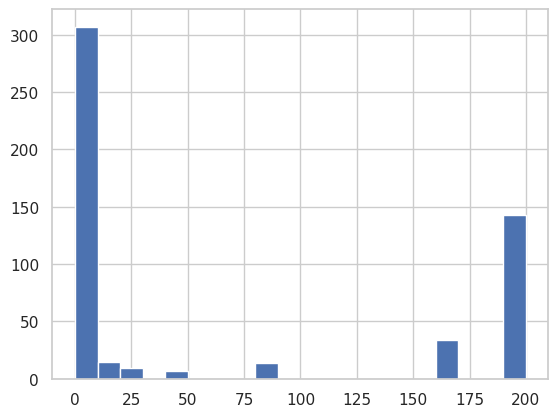

In [41]:
plt.hist(df_all.AllocCPUS, bins=20)

#### Some checks on number of completed jobs

In [42]:
completed_jobs=df_all.groupby(df_all["AllocCPUS"])[["State","ElapsedTime-hours" ]]
completed_jobs.count()

,State,ElapsedTime-hours
AllocCPUS,,
0.0,3,3
1.0,72,72
2.0,38,38
4.0,135,135
8.0,59,59
10.0,5,5
12.0,7,7
16.0,3,3
20.0,9,9


In [43]:
completed_jobs=df_all.groupby(df_all["State"])[["AllocCPUS"]]
completed_jobs.count()

,AllocCPUS
State,
COMPLETED,282
FAILED,247


### Filtering the completed jobs

In [44]:
completed_jobs=df_all.loc[df_all["State"]=="COMPLETED"]
expensive_sims = completed_jobs.sort_values(["AllocCPUS"], ascending=False)
expensive_sims.keys()

Index(['JobID', 'JobName', 'Partition', 'State', 'ElapsedTime-hours',
       'AllocCPUS', 'ReqMem', 'TOTALRAM'],
      dtype='object')

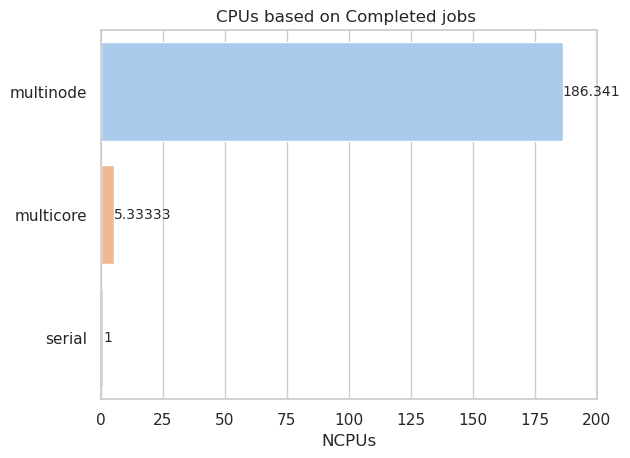

In [45]:
#Create the barplot figure
sns.set(style = "whitegrid")

figure1 = sns.barplot(data=expensive_sims, 
                      y=expensive_sims["Partition"], 
                      x=expensive_sims["AllocCPUS"], 
                      hue_order=expensive_sims["AllocCPUS"],
                      palette="pastel",
                      errorbar=('ci', False)
                     )

# Add title
figure1.set_title("CPUs based on Completed jobs ")

#Add exact values for each bars:
figure1.bar_label(figure1.containers[0], fontsize=10)

#Remove y axis
figure1.set(ylabel="")

#Change x axis
figure1.set(xlabel="NCPUs")

# Set x-axis limits to prevent negative values from exiting the graph
plt.xlim(0, expensive_sims["AllocCPUS"].max() )  # Adjust the upper limit as needed

# Show plot
plt.show()

- Maximum multinode jobs of about 200 cores and min about 1

- How do the job time correlated with CPU
- Maybe filtering the jobs that took longer than 5hours to completed

In [46]:
long_jobs=df_all.loc[df_all["ElapsedTime-hours"]>5]
long_jobs_complete=long_jobs.loc[long_jobs["State"]=="COMPLETED"]
long_jobs
long_jobs.keys()

Index(['JobID', 'JobName', 'Partition', 'State', 'ElapsedTime-hours',
       'AllocCPUS', 'ReqMem', 'TOTALRAM'],
      dtype='object')

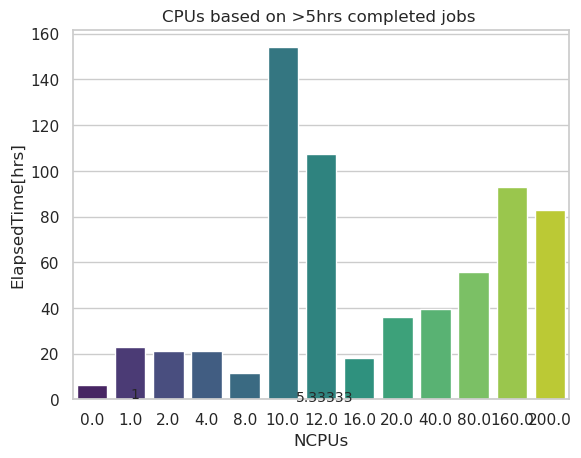

In [47]:
#Create the barplot figure
figure2 = sns.barplot(data=long_jobs, 
                      x=long_jobs["AllocCPUS"], 
                      y=long_jobs["ElapsedTime-hours"], 
                      hue_order=expensive_sims["AllocCPUS"],
                      palette="viridis",
                      errorbar=None
                     )

# Add title
figure2.set_title("CPUs based on >5hrs completed jobs ")

#Add exact values for each bars:
figure2.bar_label(figure1.containers[0], fontsize=10)

#Remove x axis
figure2.set(xlabel="NCPUs")

#Change y axis
figure2.set(ylabel="ElapsedTime[hrs]")

# Show plot
plt.show()

- CFD benefits from high CPU, example of 200 cores which can lead to shorter time-i.e. 3 days

### Boxplot for CPUs, RAM and Time elapsed for the jobs

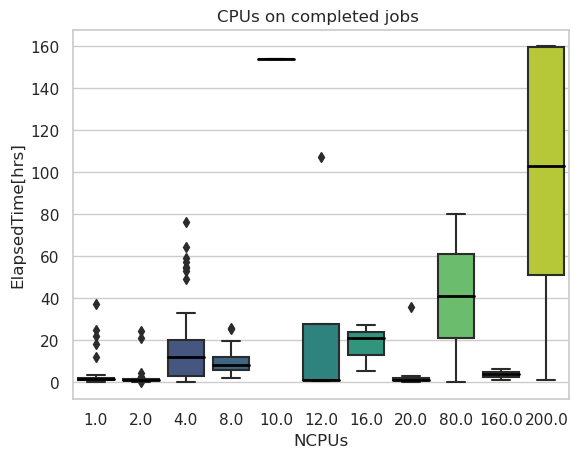

In [48]:
#Create the boxplot figure

figure4=plt.plot(figsize=(6, 10))  # 1 rows, 2 column
figure4 = sns.boxplot(data=completed_jobs, 
                      x=completed_jobs["AllocCPUS"], 
                      y=completed_jobs["ElapsedTime-hours"], 
                      hue_order=expensive_sims["AllocCPUS"],
                      palette="viridis",
                      medianprops = {"color": "black",
                                  "linewidth":2
                                    },
                      meanprops={"marker":"x",
                                 "markerfacecolor":"black"}
)

# Add title
figure4.set_title("CPUs on completed jobs ")

#Change x,y axis
figure4.set(ylabel="ElapsedTime[hrs]")
figure4.set(xlabel="NCPUs")

# Show plot
plt.show()

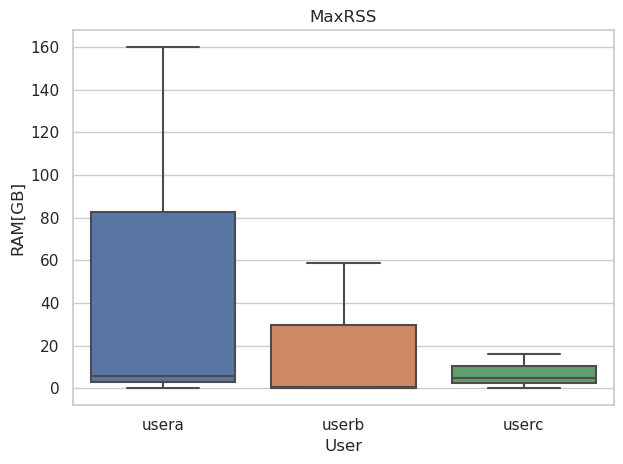

In [54]:
#min, max in KB based on maxRSS
keys = ["usera", "userb", "userc"]
values_kb = [[0, 5836.2, 163602],[0, 557.568, 60089.6], [0, 4750.5, 16660] ]
values_mb = [[val / 1024 for val in sublist] for sublist in values_kb]

userRamall=dict(zip(keys,values_mb))

# Convert to DataFrame
df = pd.DataFrame({
    "User": sum([[k] * len(v) for k, v in userRamall.items()], []),
    "RAM": sum(values_mb, [])
})


plt.plot(figsize=(6, 10))  # 1 rows, 2 column

fig=sns.boxplot(data=df, x="User", y="RAM")

fig.set_title("MaxRSS")
#Change x axis
fig.set(ylabel="RAM[GB]")
plt.tight_layout()


In [50]:
df_usera.head()

,JobID,JobName,Partition,State,ElapsedTime-hours,AllocCPUS,ReqMem,TOTALRAM
0,5098248,Run_curre+,multinode,COMPLETED,80.350800,80,320G,320
1,5110826,Run_curre+,multinode,COMPLETED,28.157200,80,320G,320
2,5115290,bash,serial,COMPLETED,0.975278,1,4G,4
3,5359164,code_satu+,serial,COMPLETED,0.003333,1,4G,4
4,5362411,code_satu+,serial,COMPLETED,0.002778,1,4G,4


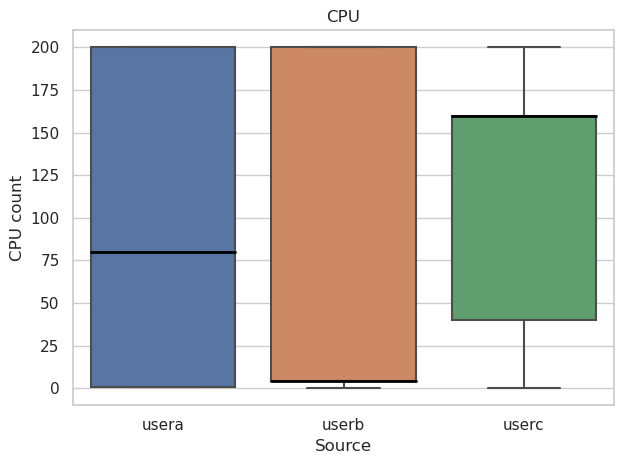

In [51]:
#Create the boxplot figure
plt.plot(figsize=(6, 10))  # 1 rows, 2 column

# Add a label to identify the source of each column
df_usera["Source"] = "usera"
df_userb2["Source"] = "userb"
df_userc2["Source"] = "userc"

# Combine into one DataFrame
combined_df = pd.concat([df_usera, df_userb2, df_userc2], ignore_index=True)

fig=sns.boxplot(data=combined_df,x="Source",y="AllocCPUS",
                                      medianprops = {"color": "black",
                                  "linewidth":2
                                    },
                      meanprops={"marker":"x",
                                 "markerfacecolor":"black"})

fig.set_title("CPU")
#Change x axis
fig.set(ylabel="CPU count")
plt.tight_layout()


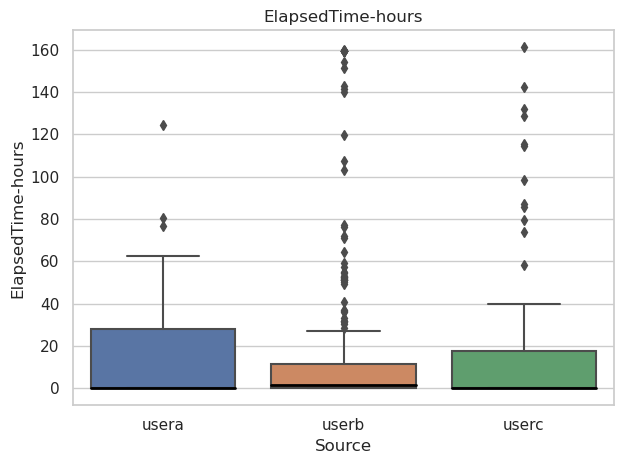

In [52]:
fig=sns.boxplot(data=combined_df,x="Source",y="ElapsedTime-hours",
                                      medianprops = {"color": "black",
                                  "linewidth":2
                                    },
                      meanprops={"marker":"x",
                                 "markerfacecolor":"black"})

fig.set_title("ElapsedTime-hours")
#Change x axis
fig.set(ylabel="ElapsedTime-hours")
plt.tight_layout()

### Show relationships between stats

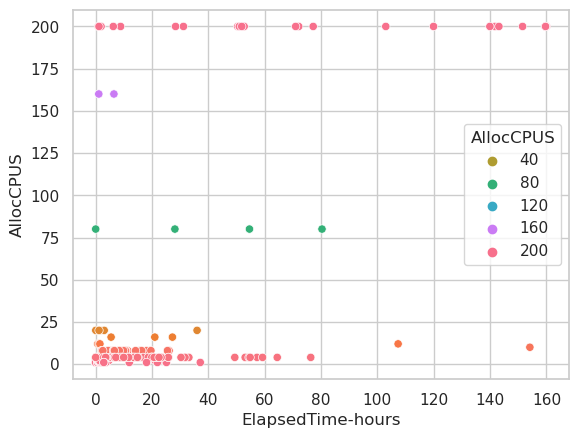

In [53]:
fig= sns.scatterplot(data=completed_jobs,
                      y="AllocCPUS", 
                      x="ElapsedTime-hours", 
                      hue="AllocCPUS",
                      palette = ("husl")
                      )

### Summary 

- Exploratory data analysis was used for the job statistics for 1 HPC cluster across 365 days for the CFD team
- It shows that CFD jobs have a variability on CPU alloc but code shows to perform well as CPUs increase
- MaxRSS of the job (max RAM) can be shown across on of the nodes of the job i.e. 

7474876      code_satu+     serial     FAILED   00:00:03                     1
7474876.bat+      batch                FAILED   00:00:03      6148K          1
7474876.ext+     extern             CANCELLED   00:00:03                     1 
7474876.0      hostname             COMPLETED   00:00:00        52K          1

so the script stats-maxRSS-csf4.jobs was used to extract the min, max and average of the user instead.

